# Feature Selection via Random Forests

Refit dataset based on feature importance generated after training a `RandomForest` classifier.

In [1]:
# import libraries
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings(action='ignore')

# import custom class
from tadpole import Tadpole

# ensemble classifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import balanced_accuracy_score, make_scorer

# import visualization library
from matplotlib import pyplot as plt
import seaborn as sns


# set seed (for reproducibility)
np.random.seed(43)

%matplotlib inline
sns.set(style='whitegrid', palette="deep", font_scale=0.7, rc={"figure.figsize": [8, 5]})

Helper Functions

In [48]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [49]:
def showConfusionMatrix(clf, X, y):
    cm = confusion_matrix(y, clf.predict(X))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, cmap='GnBu')
    ax.grid(False)

    # For 3 categories
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted ' + label_dict[0], 'Predicted ' + label_dict[1], 
                                              'Predicted ' + label_dict[2]))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual ' + label_dict[0], 'Actual ' + label_dict[1], 
                                              'Actual ' + label_dict[2]))

    for i in range(3):
        for j in range(3):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.title('Test Data Confusion Matrix')
    plt.show()
    
def computeMetrics(model, X, y):
    """
    @description:
        function to compute performance metrics
    @arguments:
        model (sklearn) - trained model
        X (np.array) - features
        y (np.array) - target
    """
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)
    BCA = balanced_accuracy_score(y, y_pred)
    mAUC = roc_auc_score(y, y_prob, multi_class="ovr", average="macro")
    return BCA, mAUC

def report(model):
    """
    @description:
        function to report trained model performance
    @arguments:
        model (sklearn) - trained model
    """
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    BCA_train, mAUC_train = computeMetrics(model, X_train, y_train)
    BCA_test, mAUC_test = computeMetrics(model, X_test, y_test)
    print("========Model Evaluation Report========")
    print("Train Score: ", score_train)
    print("Test Score: ", score_test)
    print("=======================================")
    print("Train BCA: {:.3f} | Train AUC: {:.3f}".format(BCA_train, mAUC_train))
    print("Test BCA: {:.3f} | Test AUC: {:.3f}".format(BCA_test, mAUC_test))
    print("=======================================")
    showConfusionMatrix(model, X_test, y_test)
    return [score_train, score_test, BCA_train, BCA_test, mAUC_train, mAUC_test]

def evaluate(baselearners):
    """
    @description:
        function to evaluate base learners
    @arguments:
        baselearners (sklearn) - list of trained models
    """
    metrics = []
    for name, model in baselearners.items():
        print(name)
        results = report(model)
        metrics.append([name] + results)
    return metrics

### Data Loading + Pre-processing

In [2]:
# initialize class
tp = Tadpole(debug=True)

In [3]:
# load and pre-process tadpole dataset
tp.load()
print("Labels:", tp.label_dict)

loading tadpole dataset
pre-processing dataset
Labels: {0: 'AD', 1: 'CN', 2: 'MCI'}


In [4]:
# train-test split
tp.split()

splitting dataset to train and test datasets


In [5]:
# import variables from class instance (notebook compatibility)
label_dict = tp.label_dict
X, y, X_train, X_test, y_train, y_test = tp.X, tp.y, tp.X_train, tp.X_test, tp.y_train, tp.y_test

In [6]:
# define scoring parameter
scoring = {'BA': make_scorer(balanced_accuracy_score)}

### Random Forests: Train + Grid Search

In [7]:
rfc = RandomForestClassifier(verbose=2)

In [8]:
rfc_param_grid = { 
    'n_estimators': [100, 200, 500, 1000, 2000, 5000],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth' : [None, 4, 5, 6, 7, 8, 9, 10],
    'criterion' : ['gini', 'entropy'],
    'bootstrap' : [True, False]
}

In [9]:
rfc_cv = tp.gridsearch(rfc_param_grid, rfc, scoring, n_jobs=10)

performing grid search
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   11.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  9.7min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed: 15.3min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed: 22.2min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed: 31.6min
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed: 41.5min
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed: 54.0min
[Parallel(n_jobs=10)]: Done 3840 out of 3840 | elapsed: 65.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

building tree 340 of 2000
building tree 341 of 2000
building tree 342 of 2000
building tree 343 of 2000
building tree 344 of 2000
building tree 345 of 2000
building tree 346 of 2000
building tree 347 of 2000
building tree 348 of 2000
building tree 349 of 2000
building tree 350 of 2000
building tree 351 of 2000
building tree 352 of 2000
building tree 353 of 2000
building tree 354 of 2000
building tree 355 of 2000
building tree 356 of 2000
building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tree 360 of 2000
building tree 361 of 2000
building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tree 366 of 2000
building tree 367 of 2000
building tree 368 of 2000
building tree 369 of 2000
building tree 370 of 2000
building tree 371 of 2000
building tree 372 of 2000
building tree 373 of 2000
building tree 374 of 2000
building tree 375 of 2000
building tree 376 of 2000
building tree 377 of 2000
building tre

building tree 695 of 2000
building tree 696 of 2000
building tree 697 of 2000
building tree 698 of 2000
building tree 699 of 2000
building tree 700 of 2000
building tree 701 of 2000
building tree 702 of 2000
building tree 703 of 2000
building tree 704 of 2000
building tree 705 of 2000
building tree 706 of 2000
building tree 707 of 2000
building tree 708 of 2000
building tree 709 of 2000
building tree 710 of 2000
building tree 711 of 2000
building tree 712 of 2000
building tree 713 of 2000
building tree 714 of 2000
building tree 715 of 2000
building tree 716 of 2000
building tree 717 of 2000
building tree 718 of 2000
building tree 719 of 2000
building tree 720 of 2000
building tree 721 of 2000
building tree 722 of 2000
building tree 723 of 2000
building tree 724 of 2000
building tree 725 of 2000
building tree 726 of 2000
building tree 727 of 2000
building tree 728 of 2000
building tree 729 of 2000
building tree 730 of 2000
building tree 731 of 2000
building tree 732 of 2000
building tre

building tree 1013 of 2000
building tree 1014 of 2000
building tree 1015 of 2000
building tree 1016 of 2000
building tree 1017 of 2000
building tree 1018 of 2000
building tree 1019 of 2000
building tree 1020 of 2000
building tree 1021 of 2000
building tree 1022 of 2000
building tree 1023 of 2000
building tree 1024 of 2000
building tree 1025 of 2000
building tree 1026 of 2000
building tree 1027 of 2000
building tree 1028 of 2000
building tree 1029 of 2000
building tree 1030 of 2000
building tree 1031 of 2000
building tree 1032 of 2000
building tree 1033 of 2000
building tree 1034 of 2000
building tree 1035 of 2000
building tree 1036 of 2000
building tree 1037 of 2000
building tree 1038 of 2000
building tree 1039 of 2000
building tree 1040 of 2000
building tree 1041 of 2000
building tree 1042 of 2000
building tree 1043 of 2000
building tree 1044 of 2000
building tree 1045 of 2000
building tree 1046 of 2000
building tree 1047 of 2000
building tree 1048 of 2000
building tree 1049 of 2000
b

building tree 1331 of 2000
building tree 1332 of 2000
building tree 1333 of 2000
building tree 1334 of 2000
building tree 1335 of 2000
building tree 1336 of 2000
building tree 1337 of 2000
building tree 1338 of 2000
building tree 1339 of 2000
building tree 1340 of 2000
building tree 1341 of 2000
building tree 1342 of 2000
building tree 1343 of 2000
building tree 1344 of 2000
building tree 1345 of 2000
building tree 1346 of 2000
building tree 1347 of 2000
building tree 1348 of 2000
building tree 1349 of 2000
building tree 1350 of 2000
building tree 1351 of 2000
building tree 1352 of 2000
building tree 1353 of 2000
building tree 1354 of 2000
building tree 1355 of 2000
building tree 1356 of 2000
building tree 1357 of 2000
building tree 1358 of 2000
building tree 1359 of 2000
building tree 1360 of 2000
building tree 1361 of 2000
building tree 1362 of 2000
building tree 1363 of 2000
building tree 1364 of 2000
building tree 1365 of 2000
building tree 1366 of 2000
building tree 1367 of 2000
b

building tree 1649 of 2000
building tree 1650 of 2000
building tree 1651 of 2000
building tree 1652 of 2000
building tree 1653 of 2000
building tree 1654 of 2000
building tree 1655 of 2000
building tree 1656 of 2000
building tree 1657 of 2000
building tree 1658 of 2000
building tree 1659 of 2000
building tree 1660 of 2000
building tree 1661 of 2000
building tree 1662 of 2000
building tree 1663 of 2000
building tree 1664 of 2000
building tree 1665 of 2000
building tree 1666 of 2000
building tree 1667 of 2000
building tree 1668 of 2000
building tree 1669 of 2000
building tree 1670 of 2000
building tree 1671 of 2000
building tree 1672 of 2000
building tree 1673 of 2000
building tree 1674 of 2000
building tree 1675 of 2000
building tree 1676 of 2000
building tree 1677 of 2000
building tree 1678 of 2000
building tree 1679 of 2000
building tree 1680 of 2000
building tree 1681 of 2000
building tree 1682 of 2000
building tree 1683 of 2000
building tree 1684 of 2000
building tree 1685 of 2000
b

building tree 1961 of 2000
building tree 1962 of 2000
building tree 1963 of 2000
building tree 1964 of 2000
building tree 1965 of 2000
building tree 1966 of 2000
building tree 1967 of 2000
building tree 1968 of 2000
building tree 1969 of 2000
building tree 1970 of 2000
building tree 1971 of 2000
building tree 1972 of 2000
building tree 1973 of 2000
building tree 1974 of 2000
building tree 1975 of 2000
building tree 1976 of 2000
building tree 1977 of 2000
building tree 1978 of 2000
building tree 1979 of 2000
building tree 1980 of 2000
building tree 1981 of 2000
building tree 1982 of 2000
building tree 1983 of 2000
building tree 1984 of 2000
building tree 1985 of 2000
building tree 1986 of 2000
building tree 1987 of 2000
building tree 1988 of 2000
building tree 1989 of 2000
building tree 1990 of 2000
building tree 1991 of 2000
building tree 1992 of 2000
building tree 1993 of 2000
building tree 1994 of 2000
building tree 1995 of 2000
building tree 1996 of 2000
building tree 1997 of 2000
b

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.2s finished


In [10]:
# fetch best parameter setting
rfc_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 2000}

### Feature Importance

In [11]:
# fetch importance of all features
importances = rfc_cv.best_estimator_.feature_importances_

In [12]:
# compute standard deviation and fetch indices (sorted per importance)
std = np.std([tree.feature_importances_ for tree in rfc_cv.best_estimator_], axis=0)
indices = np.argsort(importances)[::-1]

Inspect feature importances

In [13]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.714022)
2. feature 2 (0.202846)
3. feature 9 (0.046479)
4. feature 14 (0.011158)
5. feature 10 (0.004150)
6. feature 5 (0.003974)
7. feature 8 (0.003239)
8. feature 4 (0.003124)
9. feature 3 (0.002905)
10. feature 6 (0.001913)
11. feature 7 (0.001555)
12. feature 12 (0.001464)
13. feature 1 (0.001373)
14. feature 11 (0.001185)
15. feature 13 (0.000612)


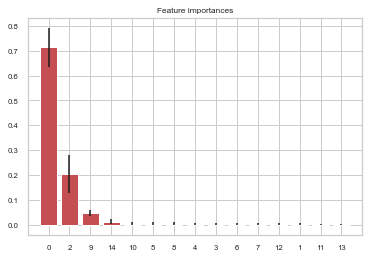

In [14]:
# plot feature importance
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.title("Feature importances")
plt.grid(True)
plt.show()

### Data Transform + Retrain Model with Feature Selection 
Based on importance of features

In [15]:
from sklearn.feature_selection import SelectFromModel

In [44]:
threshold = 0.01
sfm = SelectFromModel(rfc_cv.best_estimator_, threshold=threshold)

# Train the selector
sfm.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

building tree 347 of 2000
building tree 348 of 2000
building tree 349 of 2000
building tree 350 of 2000
building tree 351 of 2000
building tree 352 of 2000
building tree 353 of 2000
building tree 354 of 2000
building tree 355 of 2000
building tree 356 of 2000
building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tree 360 of 2000
building tree 361 of 2000
building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tree 366 of 2000
building tree 367 of 2000
building tree 368 of 2000
building tree 369 of 2000
building tree 370 of 2000
building tree 371 of 2000
building tree 372 of 2000
building tree 373 of 2000
building tree 374 of 2000
building tree 375 of 2000
building tree 376 of 2000
building tree 377 of 2000
building tree 378 of 2000
building tree 379 of 2000
building tree 380 of 2000
building tree 381 of 2000
building tree 382 of 2000
building tree 383 of 2000
building tree 384 of 2000
building tre

building tree 706 of 2000
building tree 707 of 2000
building tree 708 of 2000
building tree 709 of 2000
building tree 710 of 2000
building tree 711 of 2000
building tree 712 of 2000
building tree 713 of 2000
building tree 714 of 2000
building tree 715 of 2000
building tree 716 of 2000
building tree 717 of 2000
building tree 718 of 2000
building tree 719 of 2000
building tree 720 of 2000
building tree 721 of 2000
building tree 722 of 2000
building tree 723 of 2000
building tree 724 of 2000
building tree 725 of 2000
building tree 726 of 2000
building tree 727 of 2000
building tree 728 of 2000
building tree 729 of 2000
building tree 730 of 2000
building tree 731 of 2000
building tree 732 of 2000
building tree 733 of 2000
building tree 734 of 2000
building tree 735 of 2000
building tree 736 of 2000
building tree 737 of 2000
building tree 738 of 2000
building tree 739 of 2000
building tree 740 of 2000
building tree 741 of 2000
building tree 742 of 2000
building tree 743 of 2000
building tre

building tree 1041 of 2000
building tree 1042 of 2000
building tree 1043 of 2000
building tree 1044 of 2000
building tree 1045 of 2000
building tree 1046 of 2000
building tree 1047 of 2000
building tree 1048 of 2000
building tree 1049 of 2000
building tree 1050 of 2000
building tree 1051 of 2000
building tree 1052 of 2000
building tree 1053 of 2000
building tree 1054 of 2000
building tree 1055 of 2000
building tree 1056 of 2000
building tree 1057 of 2000
building tree 1058 of 2000
building tree 1059 of 2000
building tree 1060 of 2000
building tree 1061 of 2000
building tree 1062 of 2000
building tree 1063 of 2000
building tree 1064 of 2000
building tree 1065 of 2000
building tree 1066 of 2000
building tree 1067 of 2000
building tree 1068 of 2000
building tree 1069 of 2000
building tree 1070 of 2000
building tree 1071 of 2000
building tree 1072 of 2000
building tree 1073 of 2000
building tree 1074 of 2000
building tree 1075 of 2000
building tree 1076 of 2000
building tree 1077 of 2000
b

building tree 1388 of 2000
building tree 1389 of 2000
building tree 1390 of 2000
building tree 1391 of 2000
building tree 1392 of 2000
building tree 1393 of 2000
building tree 1394 of 2000
building tree 1395 of 2000
building tree 1396 of 2000
building tree 1397 of 2000
building tree 1398 of 2000
building tree 1399 of 2000
building tree 1400 of 2000
building tree 1401 of 2000
building tree 1402 of 2000
building tree 1403 of 2000
building tree 1404 of 2000
building tree 1405 of 2000
building tree 1406 of 2000
building tree 1407 of 2000
building tree 1408 of 2000
building tree 1409 of 2000
building tree 1410 of 2000
building tree 1411 of 2000
building tree 1412 of 2000
building tree 1413 of 2000
building tree 1414 of 2000
building tree 1415 of 2000
building tree 1416 of 2000
building tree 1417 of 2000
building tree 1418 of 2000
building tree 1419 of 2000
building tree 1420 of 2000
building tree 1421 of 2000
building tree 1422 of 2000
building tree 1423 of 2000
building tree 1424 of 2000
b

building tree 1721 of 2000
building tree 1722 of 2000
building tree 1723 of 2000
building tree 1724 of 2000
building tree 1725 of 2000
building tree 1726 of 2000
building tree 1727 of 2000
building tree 1728 of 2000
building tree 1729 of 2000
building tree 1730 of 2000
building tree 1731 of 2000
building tree 1732 of 2000
building tree 1733 of 2000
building tree 1734 of 2000
building tree 1735 of 2000
building tree 1736 of 2000
building tree 1737 of 2000
building tree 1738 of 2000
building tree 1739 of 2000
building tree 1740 of 2000
building tree 1741 of 2000
building tree 1742 of 2000
building tree 1743 of 2000
building tree 1744 of 2000
building tree 1745 of 2000
building tree 1746 of 2000
building tree 1747 of 2000
building tree 1748 of 2000
building tree 1749 of 2000
building tree 1750 of 2000
building tree 1751 of 2000
building tree 1752 of 2000
building tree 1753 of 2000
building tree 1754 of 2000
building tree 1755 of 2000
building tree 1756 of 2000
building tree 1757 of 2000
b

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    8.9s finished


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='entropy',
                                                 max_depth=4, max_features=None,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000, n_jobs=None,
                                                 oob_score=False,
                                                 

In [45]:
feat_labels = tp.df.columns.tolist()

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

RID
ADAS13
WholeBrain
ABETA_UPENNBIOMK9_04_19_17


In [46]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [47]:
# inspect datasets
X_important_train.shape, X_important_test.shape

((1384, 4), (346, 4))

Train Model with Refit Data

In [50]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(verbose=2, n_jobs=10)
clf_important.set_params(**rfc_cv.best_params_)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.2s


building tree 1 of 2000building tree 2 of 2000

building tree 3 of 2000building tree 4 of 2000

building tree 5 of 2000
building tree 6 of 2000building tree 7 of 2000
building tree 8 of 2000

building tree 9 of 2000building tree 10 of 2000

building tree 11 of 2000building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000

building tree 16 of 2000
building tree 17 of 2000building tree 18 of 2000

building tree 19 of 2000building tree 20 of 2000

building tree 21 of 2000building tree 22 of 2000

building tree 23 of 2000building tree 24 of 2000building tree 25 of 2000

building tree 26 of 2000building tree 27 of 2000


building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000building tree 33 of 2000building tree 34 of 2000building tree 35 of 2000building tree 36 of 2000building tree 37 of 2000building tree 38 of 2000


building tree 39 of 2000building tree 40 of 2000





building 

building tree 328 of 2000building tree 329 of 2000building tree 330 of 2000building tree 331 of 2000

building tree 332 of 2000

building tree 333 of 2000building tree 334 of 2000


building tree 335 of 2000
building tree 336 of 2000
building tree 337 of 2000
building tree 338 of 2000
building tree 339 of 2000
building tree 340 of 2000building tree 341 of 2000building tree 342 of 2000building tree 343 of 2000

building tree 344 of 2000


building tree 345 of 2000
building tree 346 of 2000building tree 347 of 2000

building tree 348 of 2000
building tree 349 of 2000building tree 350 of 2000
building tree 351 of 2000

building tree 352 of 2000
building tree 353 of 2000building tree 354 of 2000
building tree 355 of 2000

building tree 356 of 2000building tree 357 of 2000

building tree 358 of 2000
building tree 359 of 2000building tree 360 of 2000

building tree 361 of 2000
building tree 362 of 2000building tree 363 of 2000

building tree 364 of 2000building tree 365 of 2000

building tre

[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.4s


building tree 501 of 2000
building tree 502 of 2000
building tree 503 of 2000
building tree 504 of 2000building tree 505 of 2000
building tree 506 of 2000

building tree 507 of 2000
building tree 508 of 2000building tree 509 of 2000
building tree 510 of 2000

building tree 511 of 2000
building tree 512 of 2000
building tree 513 of 2000
building tree 514 of 2000building tree 515 of 2000

building tree 516 of 2000building tree 517 of 2000building tree 518 of 2000

building tree 519 of 2000

building tree 520 of 2000
building tree 521 of 2000
building tree 522 of 2000
building tree 523 of 2000
building tree 524 of 2000
building tree 525 of 2000building tree 526 of 2000building tree 527 of 2000
building tree 528 of 2000


building tree 529 of 2000building tree 530 of 2000

building tree 531 of 2000
building tree 532 of 2000
building tree 533 of 2000building tree 534 of 2000

building tree 535 of 2000
building tree 536 of 2000
building tree 537 of 2000building tree 538 of 2000

building tre

[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.8s


building tree 667 of 2000building tree 668 of 2000

building tree 669 of 2000building tree 670 of 2000
building tree 671 of 2000

building tree 672 of 2000building tree 673 of 2000

building tree 674 of 2000building tree 675 of 2000

building tree 676 of 2000
building tree 677 of 2000
building tree 678 of 2000building tree 679 of 2000

building tree 680 of 2000
building tree 681 of 2000
building tree 682 of 2000
building tree 683 of 2000building tree 684 of 2000

building tree 685 of 2000
building tree 686 of 2000
building tree 687 of 2000
building tree 688 of 2000building tree 689 of 2000

building tree 690 of 2000
building tree 691 of 2000
building tree 692 of 2000building tree 693 of 2000

building tree 694 of 2000
building tree 695 of 2000
building tree 696 of 2000
building tree 697 of 2000
building tree 698 of 2000
building tree 699 of 2000
building tree 700 of 2000
building tree 701 of 2000
building tree 702 of 2000
building tree 703 of 2000
building tree 704 of 2000
building tre

[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    1.2s


building tree 1007 of 2000
building tree 1008 of 2000
building tree 1009 of 2000building tree 1010 of 2000

building tree 1011 of 2000
building tree 1012 of 2000
building tree 1013 of 2000building tree 1014 of 2000

building tree 1015 of 2000building tree 1016 of 2000

building tree 1017 of 2000building tree 1018 of 2000

building tree 1019 of 2000
building tree 1020 of 2000
building tree 1021 of 2000
building tree 1022 of 2000
building tree 1023 of 2000building tree 1024 of 2000

building tree 1025 of 2000building tree 1026 of 2000
building tree 1027 of 2000

building tree 1028 of 2000
building tree 1029 of 2000building tree 1030 of 2000

building tree 1031 of 2000
building tree 1032 of 2000building tree 1033 of 2000

building tree 1034 of 2000
building tree 1035 of 2000
building tree 1036 of 2000
building tree 1037 of 2000
building tree 1038 of 2000
building tree 1039 of 2000
building tree 1040 of 2000building tree 1041 of 2000

building tree 1042 of 2000building tree 1043 of 2000bui

building tree 1315 of 2000building tree 1316 of 2000

building tree 1317 of 2000building tree 1318 of 2000building tree 1319 of 2000


building tree 1320 of 2000
building tree 1321 of 2000
building tree 1322 of 2000
building tree 1323 of 2000
building tree 1324 of 2000
building tree 1325 of 2000building tree 1326 of 2000
building tree 1327 of 2000

building tree 1328 of 2000
building tree 1329 of 2000
building tree 1330 of 2000
building tree 1331 of 2000
building tree 1332 of 2000
building tree 1333 of 2000building tree 1334 of 2000

building tree 1335 of 2000
building tree 1336 of 2000
building tree 1337 of 2000
building tree 1338 of 2000building tree 1339 of 2000

building tree 1340 of 2000
building tree 1341 of 2000building tree 1342 of 2000

building tree 1343 of 2000building tree 1344 of 2000

building tree 1345 of 2000
building tree 1346 of 2000
building tree 1347 of 2000building tree 1348 of 2000

building tree 1349 of 2000
building tree 1350 of 2000
building tree 1351 of 2000bu

[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:    1.8s



building tree 1467 of 2000
building tree 1468 of 2000

building tree 1469 of 2000
building tree 1470 of 2000
building tree 1471 of 2000
building tree 1472 of 2000
building tree 1473 of 2000
building tree 1474 of 2000
building tree 1475 of 2000
building tree 1476 of 2000
building tree 1477 of 2000
building tree 1478 of 2000
building tree 1479 of 2000
building tree 1480 of 2000
building tree 1481 of 2000
building tree 1482 of 2000building tree 1483 of 2000

building tree 1484 of 2000
building tree 1485 of 2000
building tree 1486 of 2000building tree 1487 of 2000
building tree 1488 of 2000

building tree 1489 of 2000
building tree 1490 of 2000
building tree 1491 of 2000
building tree 1492 of 2000
building tree 1493 of 2000building tree 1494 of 2000
building tree 1495 of 2000

building tree 1496 of 2000
building tree 1497 of 2000building tree 1498 of 2000
building tree 1499 of 2000

building tree 1500 of 2000
building tree 1501 of 2000
building tree 1502 of 2000
building tree 1503 of 2000

building tree 1792 of 2000
building tree 1793 of 2000building tree 1794 of 2000building tree 1795 of 2000


building tree 1796 of 2000
building tree 1797 of 2000building tree 1798 of 2000

building tree 1799 of 2000
building tree 1800 of 2000
building tree 1801 of 2000building tree 1802 of 2000

building tree 1803 of 2000
building tree 1804 of 2000building tree 1805 of 2000building tree 1806 of 2000
building tree 1807 of 2000
building tree 1808 of 2000


building tree 1809 of 2000
building tree 1810 of 2000
building tree 1811 of 2000
building tree 1812 of 2000
building tree 1813 of 2000building tree 1814 of 2000

building tree 1815 of 2000
building tree 1816 of 2000
building tree 1817 of 2000
building tree 1818 of 2000building tree 1819 of 2000

building tree 1820 of 2000
building tree 1821 of 2000
building tree 1822 of 2000
building tree 1823 of 2000
building tree 1824 of 2000
building tree 1825 of 2000building tree 1826 of 2000

building tree 1827 of 2000
building tree 1828 of 2000
b

[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    2.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=10, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

### Results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurr

========Model Evaluation Report========
Train Score:  0.8865606936416185
Test Score:  0.9132947976878613
Train BCA: 0.894 | Train AUC: 0.984
Test BCA: 0.925 | Test AUC: 0.974


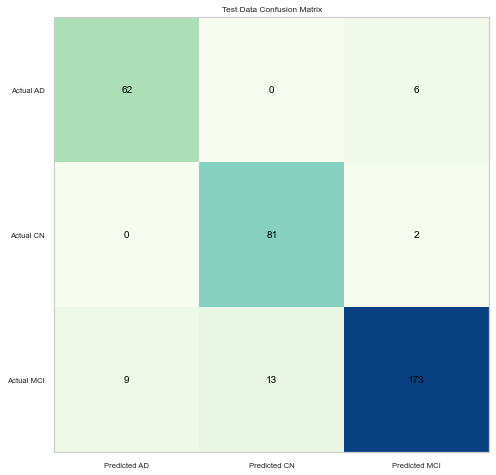

In [51]:
# with all features
_ = report(rfc_cv.best_estimator_)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    0.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:    0.2s
[Parallel(n_jobs=

========Model Evaluation Report========
Train Score:  0.8916184971098265
Test Score:  0.9017341040462428
Train BCA: 0.892 | Train AUC: 0.981
Test BCA: 0.907 | Test AUC: 0.976


[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    0.3s finished


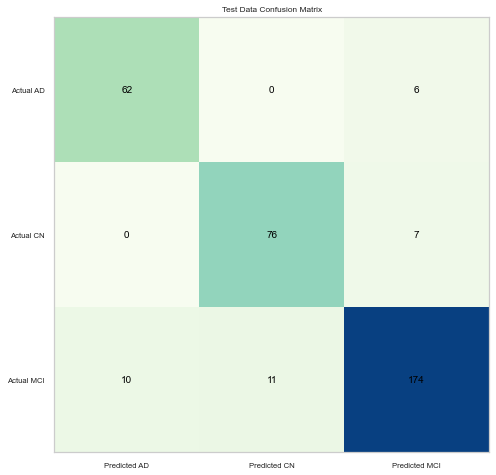

In [52]:
# with import features
score_train = clf_important.score(X_important_train, y_train)
score_test = clf_important.score(X_important_test, y_test)
BCA_train, mAUC_train = computeMetrics(clf_important, X_important_train, y_train)
BCA_test, mAUC_test = computeMetrics(clf_important, X_important_test, y_test)
print("========Model Evaluation Report========")
print("Train Score: ", score_train)
print("Test Score: ", score_test)
print("=======================================")
print("Train BCA: {:.3f} | Train AUC: {:.3f}".format(BCA_train, mAUC_train))
print("Test BCA: {:.3f} | Test AUC: {:.3f}".format(BCA_test, mAUC_test))
print("=======================================")
showConfusionMatrix(clf_important, X_important_test, y_test)

### Save Data Transformer

In [53]:
model_name = "sfm_2.pkl"

tp.save(sfm, model_name)

saving trained model
